In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

data = pd.read_excel("/content/UoW Data 2024_25.xlsx", sheet_name=1) #this function openes the second sheet within the excel file

In [2]:
data.info() #i used this function to view if i correctly openend the desired sheet, to view the columns and names, their data types and to view if there are any missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Timestamp                                                                     132 non-null    object
 1   Ethnicity                                                                     115 non-null    object
 2   Nationality                                                                   112 non-null    object
 3   No Of Dependents / Children                                                   100 non-null    object
 4   Shoe Size (UK) 
Please enter a UK shoe size.                                  195 non-null    object
 5   What are the shoes needed for?                                                114 non-null    object
 6   Employment Status                         

In [3]:
#with this function i rename the colums by shortening them so it is more readable
new_column_names = [
    'Timestamp',
    "ethnicity",
    "nationality",
    "No_Of_Dependents/Children",
    "uk_shoe_size",
    "shoe_purpose",
    "employment_status",
    "Do_you_receive_Universal_Credit?",
    "education/training",
    "looked_after_or_care_leaver",
    "recently_released_prison(in the last 6 months)",
    "seeking_asylum",
    "youth_support",
    "resole_source"
]
data.columns = new_column_names

data.to_csv("cleaned_data.csv", index=False)
print("Data loaded and columns renamed successfully!")

Data loaded and columns renamed successfully!


In [4]:
#I have dropped these columns as they are unessary and serve no purpose for our task in hand
data = data.drop(columns=(['Timestamp', "uk_shoe_size"]))

Missing values per column:
 ethnicity                                          89
nationality                                        92
No_Of_Dependents/Children                         104
shoe_purpose                                       90
employment_status                                  61
Do_you_receive_Universal_Credit?                   90
education/training                                 90
looked_after_or_care_leaver                        90
recently_released_prison(in the last 6 months)     90
seeking_asylum                                     90
youth_support                                      91
resole_source                                     100
dtype: int64
Data types:
 ethnicity                                         object
nationality                                       object
No_Of_Dependents/Children                         object
shoe_purpose                                      object
employment_status                                 object
Do_you_receiv

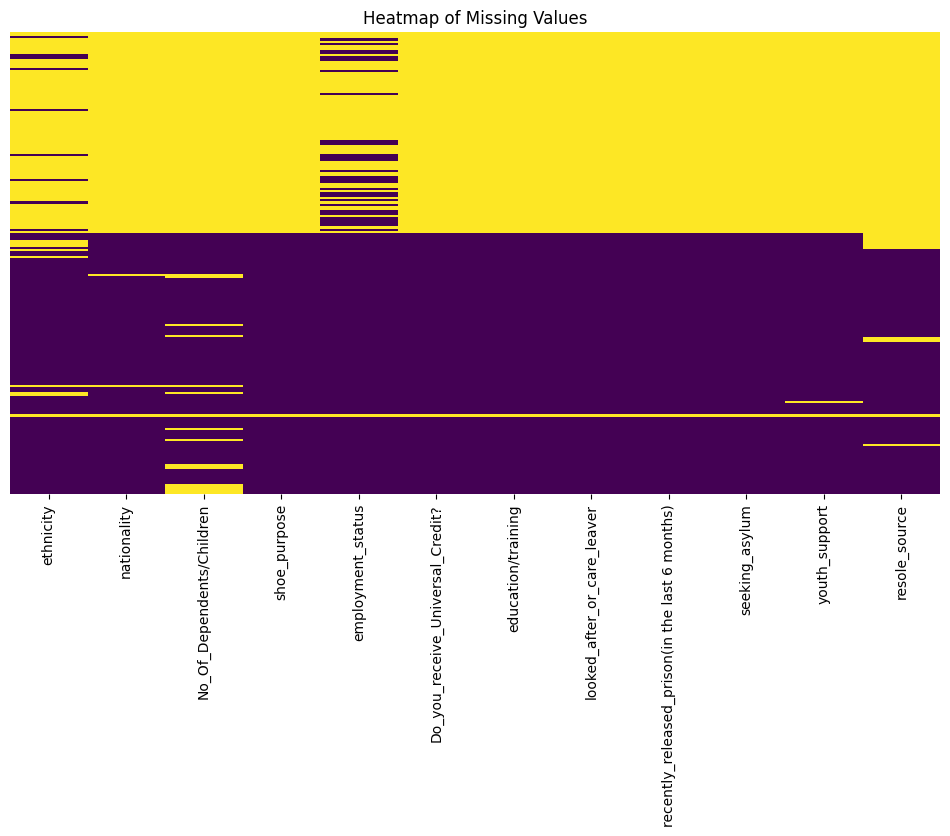

In [5]:
#With this code i created a heatmap that identified columns that have mising values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

print("Data types:\n", data.dtypes)


plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

In [6]:
data = data.dropna(thresh=len(data.columns)-3)  #This drops rows with 3 or more missing values (unsalvageable data)

In [7]:
data.isna().sum()/len(data)*100 #This function informs me of the percentage of missing values per column

,0
ethnicity,7.017544
nationality,1.754386
No_Of_Dependents/Children,12.280702
shoe_purpose,0.000000
employment_status,0.000000
Do_you_receive_Universal_Credit?,0.000000
education/training,0.000000
looked_after_or_care_leaver,0.000000
recently_released_prison(in the last 6 months),0.000000
seeking_asylum,0.000000


In [8]:
#This function shows me all the values within this column so I would be able to standardise the values
data["No_Of_Dependents/Children"].unique()

array([0, 1, '3 kids', '3 chlid', 3, 'no', 'No', nan, 2, 5, 4, 'Children',
       '3 childrens', 'I am alone', 'No '], dtype=object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 89 to 203
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   ethnicity                                       106 non-null    object
 1   nationality                                     112 non-null    object
 2   No_Of_Dependents/Children                       100 non-null    object
 3   shoe_purpose                                    114 non-null    object
 4   employment_status                               114 non-null    object
 5   Do_you_receive_Universal_Credit?                114 non-null    object
 6   education/training                              114 non-null    object
 7   looked_after_or_care_leaver                     114 non-null    object
 8   recently_released_prison(in the last 6 months)  114 non-null    object
 9   seeking_asylum                                  114 non-nu

In [10]:
#MOURAD CODE
# #With this block of code i encoded the values
# #data['No_Of_Dependents/Children'] = data['No_Of_Dependents/Children'].map({'3 kids': 3, '3 chlid': 3, 'no': 0, 'No': 0, 'No ': 0, 'Children': 1,'3 childrens': 3, 'I am alone': 0, '0': 0, '1': 1, '3': 3, '2': 2, '5': 5, '4': 4,})



# data.loc['No_of_Dependents/children'] = data['No_of_Dependents/children'].map({'3 kids': 3, '3 chlid': 3, 'no': 0, 'No': 0, 'No ': 0, 'Children': 1,'3 childrens': 3, 'I am alone': 0, '0': 0, '1': 1, '3': 3, '2': 2, '5': 5, '4': 4,})

In [11]:
#KELVIN CODE TO FIX DEPENDENTS ENCODING/MAPPING

# Convert 'No_Of_Dependents/Children' to string type as encoding without this removes all NaN values
data['No_Of_Dependents/Children'] = data['No_Of_Dependents/Children'].astype(str)

# Apply the mapping
data.loc[:, 'No_Of_Dependents/Children'] = data['No_Of_Dependents/Children'].map({'3 kids': '3', '3 chlid': '3', 'no': '0', 'No': '0', 'No ': '0', 'Children': '1','3 childrens': '3', 'I am alone': '0', '0': '0', '1': '1', '3': '3', '2': '2', '5': '5', '4': '4'})

# NEED TO SORT NAN VALUES BEFORE CAN CONVERT THIS COLUMN TO AN INT FOR ANALYSIS

data['No_Of_Dependents/Children'].unique()

data.isna().sum()/len(data)*100 #This function informs me of the percentage of missing values per column
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 89 to 203
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   ethnicity                                       106 non-null    object
 1   nationality                                     112 non-null    object
 2   No_Of_Dependents/Children                       100 non-null    object
 3   shoe_purpose                                    114 non-null    object
 4   employment_status                               114 non-null    object
 5   Do_you_receive_Universal_Credit?                114 non-null    object
 6   education/training                              114 non-null    object
 7   looked_after_or_care_leaver                     114 non-null    object
 8   recently_released_prison(in the last 6 months)  114 non-null    object
 9   seeking_asylum                                  114 non-nu

<ipython-input-11-035dc81e9fd1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No_Of_Dependents/Children'] = data['No_Of_Dependents/Children'].astype(str)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 89 to 203
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   ethnicity                                       106 non-null    object
 1   nationality                                     112 non-null    object
 2   No_Of_Dependents/Children                       100 non-null    object
 3   shoe_purpose                                    114 non-null    object
 4   employment_status                               114 non-null    object
 5   Do_you_receive_Universal_Credit?                114 non-null    object
 6   education/training                              114 non-null    object
 7   looked_after_or_care_leaver                     114 non-null    object
 8   recently_released_prison(in the last 6 months)  114 non-null    object
 9   seeking_asylum                                  114 non-nu

In [13]:
# I perfomerd this to check if my code was succesfully executed
data["No_Of_Dependents/Children"].unique()

array(['0', '1', '3', nan, '2', '5', '4'], dtype=object)

In [14]:
#This function shows me all the values within this column so I would be able to standardise the values
data['ethnicity'].unique()

array(['Eritrean', 'Sudanese', 'Latino', nan, 'British', 'Pakistan',
       'Iran', 'Filipino', 'German', 'Irish', 'Afghani', 'Ethiopian',
       'Black African ', 'Africa ', 'EUROPIAN', 'Black - African',
       'Asian', 'Black Caribbean ', 'South Asian', 'Indian', 'English',
       'African', 'Cypriot', 'Romanian', 'Caribbean', 'Iranian', 'Polish',
       'Arab', 'India', 'Srilankan ', 'Black African', 'White / English',
       'Mixed Race ', 'British ', 'Persian', 'Afghan',
       'Black  Caribbean ', 'African caribbean british', 'Arab ',
       'African caribbean british ', 'African ', 'Caribbean british ',
       'Sierra Leonean ', 'Spanish', 'Black', 'Bangladeshi ',
       'Black british ', 'Europe mixed raced', 'Afghanistan ',
       'South american', 'london', 'Not know', 'White ', 'Afghani ',
       'Black British ', 'Mix', 'White', 'Mix black white',
       'Balochistan (Pakistan)', 'albanian', 'Africans ',
       'Africans  Black ', 'White British', 'male', 'Bangladeshi',
  

In [15]:
# this code shoes the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['ethnicity'].value_counts()

,count
ethnicity,
Asian,5
British,4
Eritrean,4
Black,3
White,3
...,...
Kurd,1
Mixed,1
British African,1


In [16]:
#This function shows me all the values within this column so I would be able to standardise the values
data['nationality'].unique()

array(['British ', 'Refugee Status granted in 2024', 'Venezuelan',
       'Asylum seeker', 'Sudanese', 'Pakistani ', 'Iran', 'Spanish',
       'German ', 'irish', 'Afghani', 'Iran ', 'Ethiopian ', 'Eritrean ',
       nan, 'Chadian ', 'Nigeria ', 'ALBENIAN', 'Mauritian', 'Indian',
       'Kittisian/British', 'Afghanistan', 'English', 'African',
       'British', 'Romanian', 'Iranian', 'Polish', 'Egypt', 'Srilankan ',
       'Nigerian ', 'Congolese ', 'UK national', 'Afghan', 'Sierra leone',
       'Brithish', 'Democratic Republic of Congo ', 'Carribean ', 'Uk',
       'Brit ', 'Spanish ', 'Iranian ', 'Syrian', 'Asian', 'Not known',
       'Afghanistan ', 'Eritrean', 'Brasileiro ', 'Brazilian',
       'Motswana0', 'Balochistani', 'albania', 'Gambian', 'Motswana',
       'Motswana ', 'Syria ', 'Yemen', 'Kuwait', 'Jordanian', 'Namibian',
       'Iraqi', 'Italian ', 'SOMALI', 'Colombia ', 'Ethiopian'],
      dtype=object)

In [17]:
# this code shoes the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['nationality'].value_counts()

,count
nationality,
British,19
British,8
Iranian,5
Indian,4
Afghanistan,4
...,...
Namibian,1
Italian,1
SOMALI,1


In [18]:
#with this code i mapped the ethnicity and nationality columns to standardise them

ethnicity_mapping = {
    "Asian or Asian British": ["Asian", "South Asian", "Pakistan", "Balochistan (Pakistan)", "India", "Indian", "Bangladeshi", "Bangladeshi ", "Filipino", "Srilankan "],

    "Black, Black British, Caribbean or African": ["British African", "African caribbean british", "African", "African caribbean british ", "Caribbean british ", "Caribbean", "Black ",
                                                   "Black Caribbean ", "Black African", "Black African ", "Black British ", "Black british ", "Black - African",
                                                   "Africa ", "Africans ", "African ", "Sierra Leonean ", "Eritrean", "Ethiopian", "Sudanese", "Africans  Black ", "Black", "Black  Caribbean "],

    "Mixed or Multiple Ethnic Groups": ["Mixed", "Mixed Race ", "Mix", "Mix black white", "Europe mixed raced"],

    "White": ["British", "British ", "White", "White ", "White / English", "White British", "EUROPIAN", "English", "Irish", "German", "Romanian", "Polish", "Spanish", "albanian", "Cypriot"],

    "Other Ethnic Groups": ["Kurdish", "Kurd", "Irani ", "Iran", "Persian", "Iranian", "Arab", "Arab ", "Arab without kuwait", "Arabic", "South american", "Latino", "Latioamericana", "Afghani", "Afghani ", "Afghanistan ", "Afghan"],

    "Unknown": ["Not know", "male", "london"]


}

nationality_mapping = {

    "Asian": ["Asian"],

    "Afghanistan" : ["Afghan", "Afghani", "Afghanistan", "Afghanistan "],

    "Pakistani" : ["Pakistani ", "Balochistani"],

    "Indian" : ["Indian"],

    "Srilankan" : ["Srilankan "],

    "Carribea": ["Carribean "],

    "Gambian": ["Gambian"],

    "Mauritian": ["Mauritian"],

    "Congolese": ["Congolese ", "Democratic Republic of Congo "],

    "Chadian": ["Chadian "],

    "Somali": ["SOMALI"],

    "Sierra Leonean": ["Sierra leone"],

    "Eritrean": ["Eritrean ", "Eritrean"],

    "Ethiopian": ["Ethiopian ", "Ethiopian"],

    "Sudanese": ["Sudanese "],

    "Botswanaan": ["Motswana ", "Motswana0", "Motswana"],

    "Namibian": ["Namibian"],

    "Egypt": ["Egypt"],

    "Nigera": ["Nigerian ", "Nigeria "],

    "German": ["German "],

    "Spanish": ["Spanish ", "Spanish"],

    "Italian": ["Italian "],

    "Albanian": ["Albanian", "ALBENIAN", "albania"],

    "British": ["Kittisian/British", "British", "British ", "Brithish", "Brit ", "English", "UK national", "Uk"],

    "Irish": ["irish"],

    "Romania": ["Romanian"],

    "Polish": ["Polish"],

    "Iran": ["Iranian ", "Iranian", "Iran", "Iran "],

    "Kuwait": ["Kuwait"],

    "Jordanian": ["Jordanian"],

    "Iraqi": ["Iraqi"],

    "Syrian": ["Syrian", "Syria "],

    "Yemen": ["Yemen"],

    "Brazil": ["Brasileiro ", "Brazilian"],

    "Colombian": ["Colombia "],

    "Venezuelan": ["Venezuelan"],

    "Unknown": ["Refugee Status granted in 2024", "Asylum seeker", "Not known"]

}


def standardize_column_values(column, mapping):
    for standard, variants in mapping.items():
        column = column.replace(variants, standard)
    return column


data["ethnicity"] = standardize_column_values(data["ethnicity"], ethnicity_mapping)
data["nationality"] = standardize_column_values(data["nationality"], nationality_mapping)


cleaned_file_path = "/content/cleaned_data.csv"
data.to_csv(cleaned_file_path, index=False)

cleaned_file_path

'/content/cleaned_data.csv'

In [19]:
# I perfomerd this to check if my code was succesfully executed
data['ethnicity'].unique()

array(['Black, Black British, Caribbean or African',
       'Other Ethnic Groups', nan, 'White', 'Asian or Asian British',
       'Mixed or Multiple Ethnic Groups', 'Unknown'], dtype=object)

In [20]:
# I perfomerd this to check if my code was succesfully executed
data['ethnicity'].value_counts()

,count
ethnicity,
"Black, Black British, Caribbean or African",36
Other Ethnic Groups,28
White,20
Asian or Asian British,14
Mixed or Multiple Ethnic Groups,5
Unknown,3


In [21]:
# I perfomerd this to check if my code was succesfully executed
data['nationality'].unique()

array(['British', 'Unknown', 'Venezuelan', 'Sudanese', 'Pakistani',
       'Iran', 'Spanish', 'German', 'Irish', 'Afghanistan', 'Ethiopian',
       'Eritrean', nan, 'Chadian', 'Nigera', 'Albanian', 'Mauritian',
       'Indian', 'African', 'Romania', 'Polish', 'Egypt', 'Srilankan',
       'Congolese', 'Sierra Leonean', 'Carribea', 'Syrian', 'Asian',
       'Brazil', 'Botswanaan', 'Gambian', 'Yemen', 'Kuwait', 'Jordanian',
       'Namibian', 'Iraqi', 'Italian', 'Somali', 'Colombian'],
      dtype=object)

In [22]:
# I perfomerd this to check if my code was succesfully executed
data['nationality'].value_counts()

,count
nationality,
British,34
Iran,9
Afghanistan,9
Unknown,4
Eritrean,4
Indian,4
Spanish,3
Botswanaan,3
Pakistani,3


In [23]:
#This function shows me all the values within this column so I would be able to standardise the values
data['Do_you_receive_Universal_Credit?'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
# this code shoWs the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['Do_you_receive_Universal_Credit?'].value_counts()

,count
Do_you_receive_Universal_Credit?,
No,63
Yes,51


In [25]:
#This function shows me all the values within this column so I would be able to standardise the values
data['recently_released_prison(in the last 6 months)'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
# this code shoes the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['recently_released_prison(in the last 6 months)'].value_counts()

,count
recently_released_prison(in the last 6 months),
No,112
Yes,2


In [27]:
#This function shows me all the values within this column so I would be able to standardise the values
data['education/training'].unique()

array(['No', 'Yes', 'Asylum seeker ', 'asylum seeker',
       'Voluntary work in the charity sector ', 'Gym ',
       'Just started a CSC 4 week course.',
       'starting at West London College Hammersmith next week',
       'Finalising my foundation in music therapy for people with dementia. I can assist music therapists or do music freelancing work with seniors',
       'Not yet still waiting to do English ', 'Im on  the waiting list',
       'Im in the waiting list', 'Croydon College ', 'ESOL'], dtype=object)

In [28]:
# this code shoes the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['education/training'].value_counts()

,count
education/training,
No,72
Yes,30
Asylum seeker,1
asylum seeker,1
Voluntary work in the charity sector,1
Gym,1
Just started a CSC 4 week course.,1
starting at West London College Hammersmith next week,1
Finalising my foundation in music therapy for people with dementia. I can assist music therapists or do music freelancing work with seniors,1


In [29]:
#This function shows me all the values within this column so I would be able to standardise the values
data['looked_after_or_care_leaver'].unique()

array(['No', 'Yes', 'Father ', 'Guardian ', 'young asylum seeker',
       'Yes by Hotel stuff'], dtype=object)

In [30]:
# this code shoes the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['looked_after_or_care_leaver'].value_counts()

,count
looked_after_or_care_leaver,
No,94
Yes,16
Father,1
Guardian,1
young asylum seeker,1
Yes by Hotel stuff,1


In [31]:
#This function shows me all the values within this column so I would be able to standardise the values
data['seeking_asylum'].unique()

array(['Victim of trafficking/modern slavery (NRM) ', 'Yes', 'No',
       'Asylum seeker ', 'Refugee', 'I am seeking Assylum in the UK',
       'Refugee Status (5 years)'], dtype=object)

In [32]:
# this code shoes the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['seeking_asylum'].value_counts()

,count
seeking_asylum,
Yes,57
No,51
Refugee,2
Victim of trafficking/modern slavery (NRM),1
Asylum seeker,1
I am seeking Assylum in the UK,1
Refugee Status (5 years),1


In [33]:
#This function shows me all the values within this column so I would be able to standardise the values
data['youth_support'].unique()

array(['Advocacy worker', 'Advocate', 'No', 'Yes',
       'Support worker from Hestia Charity ', 'Outreach Advocate',
       'refuge support worker', 'Social Prescriber ', nan,
       'Outreach Advocate Hestia Modern Slavery Response Team',
       'Im in the Home Office hotel accommodation ', 'Yes, No'],
      dtype=object)

In [34]:
# this code shoes the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['youth_support'].value_counts()

,count
youth_support,
No,90
Yes,14
Advocacy worker,1
Advocate,1
Support worker from Hestia Charity,1
Outreach Advocate,1
refuge support worker,1
Social Prescriber,1
Outreach Advocate Hestia Modern Slavery Response Team,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 89 to 203
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   ethnicity                                       106 non-null    object
 1   nationality                                     112 non-null    object
 2   No_Of_Dependents/Children                       100 non-null    object
 3   shoe_purpose                                    114 non-null    object
 4   employment_status                               114 non-null    object
 5   Do_you_receive_Universal_Credit?                114 non-null    object
 6   education/training                              114 non-null    object
 7   looked_after_or_care_leaver                     114 non-null    object
 8   recently_released_prison(in the last 6 months)  114 non-null    object
 9   seeking_asylum                                  114 non-nu

In [36]:
#with this code i encoded and mapped the following variables in order to make the dataset more readable
label_encoder = preprocessing.LabelEncoder()

data["Do_you_receive_Universal_Credit?"]= label_encoder.fit_transform(data["Do_you_receive_Universal_Credit?"]) #1 yes i have, 0 no i havent

data["recently_released_prison(in the last 6 months)"]= label_encoder.fit_transform(data["recently_released_prison(in the last 6 months)"]) #1 yes i have, 0 no i havent

data["education/training"] = data["education/training"].map({"No": 0 , "Yes": 1 , "Asylum seeker": 0 , "asylum seeker": 0 , "Voluntary work in the charity sector": 0 , "Gym": 0 , "Just started a CSC 4 week course": 1 ,
                                                             "starting at West London College Hammersmith next week": 1 , "Finalising my foundation in music therapy for people with dementia. I can assist music therapists or do music freelancing work with seniors": 1 ,
                                                             "Not yet still waiting to do English": 1 , "Im on  the waiting list": 0 , "Im in the waiting list": 0 , "Croydon College": 0 , "ESOL": 1}) #education = 0 #training = 1

data["looked_after_or_care_leaver"] = data["looked_after_or_care_leaver"].map({"No": 0 , "Yes": 1 , "Father": 0 , "Guardian": 0 , "young asylum seeker": 1 , "Yes by Hotel stuff":1})  # 1 yes i am, 0 no im not

data["seeking_asylum"] = data["seeking_asylum"].map({"Victim of trafficking/modern slavery (NRM)": 1 , "Yes": 1 , "No": 0 , "Asylum seeker": 1 , "Refugee": 0 , "I am seeking Assylum in the UK": 1 , "Refugee Status (5 years)": 0}) # 1 yes i am, 0 no im not

data["youth_support"] = data["youth_support"].map({"Advocacy worker": 0 , "Advocate": 0 , "No": 0 , "Yes": 1 , "Support worker from Hestia Charity": 0 , "Outreach Advocate": 0 , "refuge support worker": 0 , "Social Prescriber": 0 ,
                                                   "Outreach Advocate Hestia Modern Slavery Response Team": 0 , "Im in the Home Office hotel accommodation": 0 , "Yes, No": 0}) # 1 yes i am 0 no im not

output_file = "cleaned_data.csv"
data.to_csv(output_file, index=False)
print(f"Data saved as {output_file} after modifications.")

Data saved as cleaned_data.csv after modifications.


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 89 to 203
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ethnicity                                       106 non-null    object 
 1   nationality                                     112 non-null    object 
 2   No_Of_Dependents/Children                       100 non-null    object 
 3   shoe_purpose                                    114 non-null    object 
 4   employment_status                               114 non-null    object 
 5   Do_you_receive_Universal_Credit?                114 non-null    int64  
 6   education/training                              108 non-null    float64
 7   looked_after_or_care_leaver                     112 non-null    float64
 8   recently_released_prison(in the last 6 months)  114 non-null    int64  
 9   seeking_asylum                                 

In [38]:
# I perfomerd this to check if my code was succesfully executed
data['Do_you_receive_Universal_Credit?'].value_counts()

,count
Do_you_receive_Universal_Credit?,
0,63
1,51


In [39]:
# I perfomerd this to check if my code was succesfully executed
data['Do_you_receive_Universal_Credit?'].unique()

array([1, 0])

In [40]:
# I perfomerd this to check if my code was succesfully executed
data['recently_released_prison(in the last 6 months)'].value_counts()

,count
recently_released_prison(in the last 6 months),
0,112
1,2


In [41]:
# I perfomerd this to check if my code was succesfully executed
data['recently_released_prison(in the last 6 months)'].unique()

array([0, 1])

In [42]:
# I perfomerd this to check if my code was succesfully executed
data['education/training'].value_counts()

,count
education/training,
0.0,75
1.0,33


In [43]:
# I perfomerd this to check if my code was succesfully executed
data['education/training'].unique()

array([ 0.,  1., nan])

In [44]:
# I perfomerd this to check if my code was succesfully executed
data['looked_after_or_care_leaver'].value_counts()

,count
looked_after_or_care_leaver,
0.0,94
1.0,18


In [45]:
# I perfomerd this to check if my code was succesfully executed
data['looked_after_or_care_leaver'].unique()

array([ 0.,  1., nan])

In [46]:
# I perfomerd this to check if my code was succesfully executed
data['seeking_asylum'].value_counts()

,count
seeking_asylum,
1.0,58
0.0,54


In [47]:
# I perfomerd this to check if my code was succesfully executed
data['seeking_asylum'].unique()

array([nan,  1.,  0.])

In [48]:
# I perfomerd this to check if my code was succesfully executed
data['youth_support'].value_counts()

,count
youth_support,
0.0,96
1.0,14


In [49]:
# I perfomerd this to check if my code was succesfully executed
data['youth_support'].unique()

array([ 0.,  1., nan])

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 89 to 203
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ethnicity                                       106 non-null    object 
 1   nationality                                     112 non-null    object 
 2   No_Of_Dependents/Children                       100 non-null    object 
 3   shoe_purpose                                    114 non-null    object 
 4   employment_status                               114 non-null    object 
 5   Do_you_receive_Universal_Credit?                114 non-null    int64  
 6   education/training                              108 non-null    float64
 7   looked_after_or_care_leaver                     112 non-null    float64
 8   recently_released_prison(in the last 6 months)  114 non-null    int64  
 9   seeking_asylum                                 

In [51]:
data["employment_status"].unique()

array(['unable to work as outlined by HO', 'Unemployed',
       'Unable to work (please specify)',
       'Work not allowed because asylum seekers ', 'Asylum seeker',
       'Ongoing mental and physical health conditions ',
       'Asylum seeker- No Work permit', 'Asylum seeker ',
       'Seeking asylum ', 'Disabled and currently ill', ' service users',
       'Refugee/Asylum seeker', 'Employed part-time',
       'I am an asylum seeker and I do not have a permission to work yet.',
       'Anisa and Aadil are both asylum seekers, so legally unable to work',
       'Temporarily unable to work due to mental disability ',
       'No rights to work in the UK',
       'asylum seeker with work permission however unable to find work given the difficulty imposed',
       'Asylum seeker. Unable to work and no recourse to public funds. ',
       'In the refuge for domestic abuse ', 'Asylum seeker (NRPF)',
       'on PIP ', 'Limited capability to work ',
       'Disabled unable to work ', 'asylum 

In [52]:
mapping = {
    "Unable to work (please specify)": "Unable to work" , "Asylum seeker": "Asylum seeker", "Asylum seeker ": "Asylum seeker",
                                                          "Seeking asylum ": "Asylum seeker", "asylum seeker": "Asylum seeker",
                                                          "Asylum Seeker": "Asylum seeker", "Asylum  seeker": "Asylum seeker", "Assylum  Seekers ": "Asylum seeker", "College ": "College",
                                                          "College":"College", "Asylum  seekers ": "Asylum seeker",
}

# Use .map() with the .get() method to provide a default value (the original value)
data["employment_status"] = data["employment_status"].map(lambda x: mapping.get(x, x))




In [53]:
data["employment_status"].unique()

array(['unable to work as outlined by HO', 'Unemployed', 'Unable to work',
       'Work not allowed because asylum seekers ', 'Asylum seeker',
       'Ongoing mental and physical health conditions ',
       'Asylum seeker- No Work permit', 'Disabled and currently ill',
       ' service users', 'Refugee/Asylum seeker', 'Employed part-time',
       'I am an asylum seeker and I do not have a permission to work yet.',
       'Anisa and Aadil are both asylum seekers, so legally unable to work',
       'Temporarily unable to work due to mental disability ',
       'No rights to work in the UK',
       'asylum seeker with work permission however unable to find work given the difficulty imposed',
       'Asylum seeker. Unable to work and no recourse to public funds. ',
       'In the refuge for domestic abuse ', 'Asylum seeker (NRPF)',
       'on PIP ', 'Limited capability to work ',
       'Disabled unable to work ', 'College Student ', 'College',
       'Had two major operations, no longer w

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 89 to 203
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ethnicity                                       106 non-null    object 
 1   nationality                                     112 non-null    object 
 2   No_Of_Dependents/Children                       100 non-null    object 
 3   shoe_purpose                                    114 non-null    object 
 4   employment_status                               114 non-null    object 
 5   Do_you_receive_Universal_Credit?                114 non-null    int64  
 6   education/training                              108 non-null    float64
 7   looked_after_or_care_leaver                     112 non-null    float64
 8   recently_released_prison(in the last 6 months)  114 non-null    int64  
 9   seeking_asylum                                 

In [55]:
data['ethnicity'].fillna(data['ethnicity'].mode()[0], inplace=True)
data['nationality'].fillna(data['nationality'].mode()[0], inplace=True)
data['No_Of_Dependents/Children'].fillna(data['No_Of_Dependents/Children'].mode()[0], inplace=True)
data['education/training'].fillna(data['education/training'].mode()[0], inplace=True)
data['looked_after_or_care_leaver'].fillna(data['looked_after_or_care_leaver'].mode()[0], inplace=True)
data['recently_released_prison(in the last 6 months)'].fillna(data['recently_released_prison(in the last 6 months)'].mode()[0], inplace=True)
data['seeking_asylum'].fillna(data['seeking_asylum'].mode()[0], inplace=True)
data['youth_support'].fillna(data['youth_support'].mode()[0], inplace=True)

data.to_csv("/content/cleaned_data.csv", index=False)

print("Filling missing values completed!")

Filling missing values completed!


<ipython-input-55-affb04e43313>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ethnicity'].fillna(data['ethnicity'].mode()[0], inplace=True)
<ipython-input-55-affb04e43313>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 89 to 203
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ethnicity                                       114 non-null    object 
 1   nationality                                     114 non-null    object 
 2   No_Of_Dependents/Children                       114 non-null    object 
 3   shoe_purpose                                    114 non-null    object 
 4   employment_status                               114 non-null    object 
 5   Do_you_receive_Universal_Credit?                114 non-null    int64  
 6   education/training                              114 non-null    float64
 7   looked_after_or_care_leaver                     114 non-null    float64
 8   recently_released_prison(in the last 6 months)  114 non-null    int64  
 9   seeking_asylum                                 

# **Kelvin Code (EDA)**

In [57]:
data['resole_source'].fillna("Source Missing", inplace=True)

<ipython-input-57-6755e46b41dd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['resole_source'].fillna("Source Missing", inplace=True)


In [58]:
data.to_excel("UoW Data 2024_25_CLEANED.xlsx", index=False)  # Output cleaned data
#(Mourad edit this file is the final saved file)

In [59]:
print(data.describe(include="object"))
print(data.describe())

                                         ethnicity nationality  \
count                                          114         114   
unique                                           6          38   
top     Black, Black British, Caribbean or African     British   
freq                                            44          36   

       No_Of_Dependents/Children  shoe_purpose employment_status  \
count                        114           114               114   
unique                         6             9                26   
top                            0  Everyday use        Unemployed   
freq                          68            77                44   

                resole_source  
count                     114  
unique                     74  
top     Brixton soup kitchen   
freq                       11  
       Do_you_receive_Universal_Credit?  education/training  \
count                        114.000000          114.000000   
mean                           0.447368   

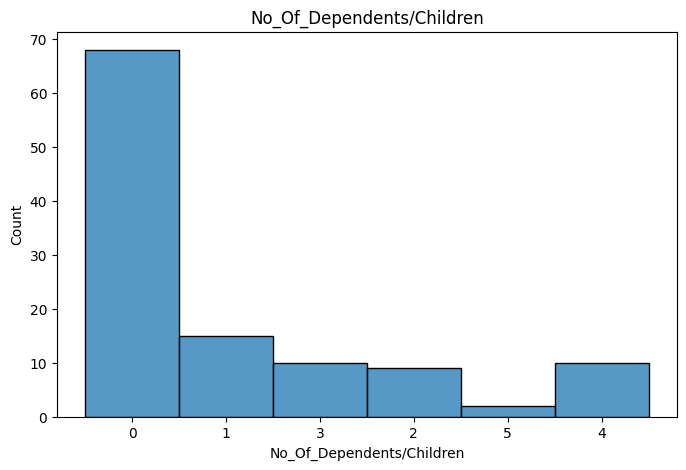

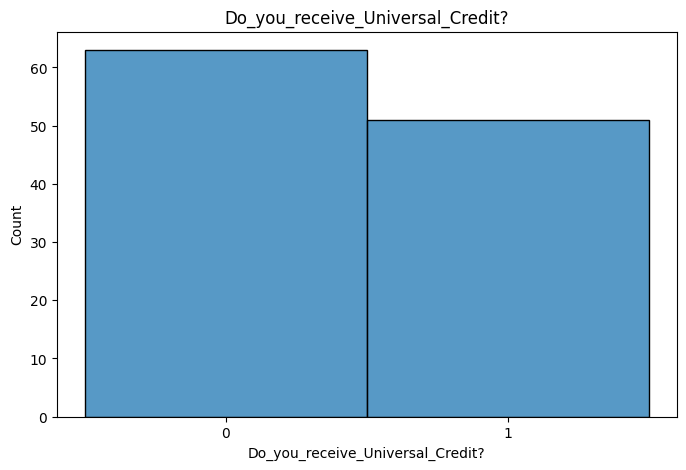

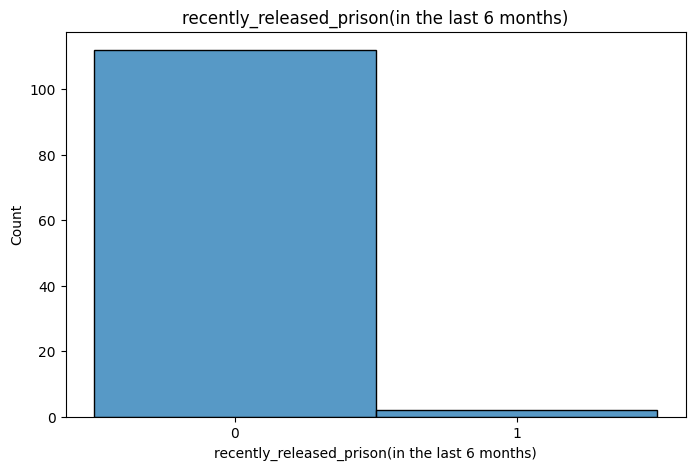

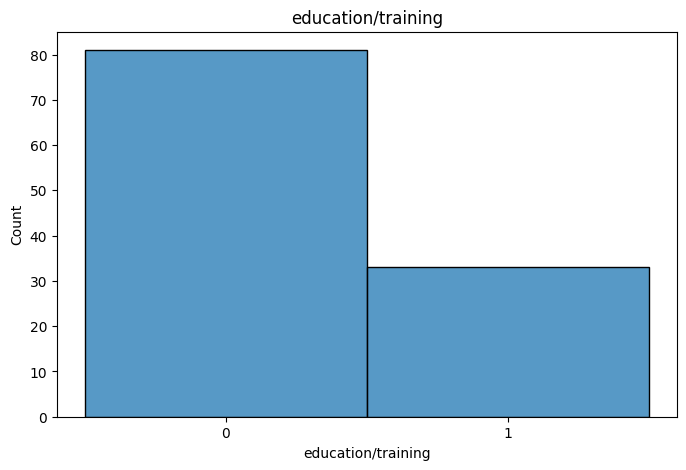

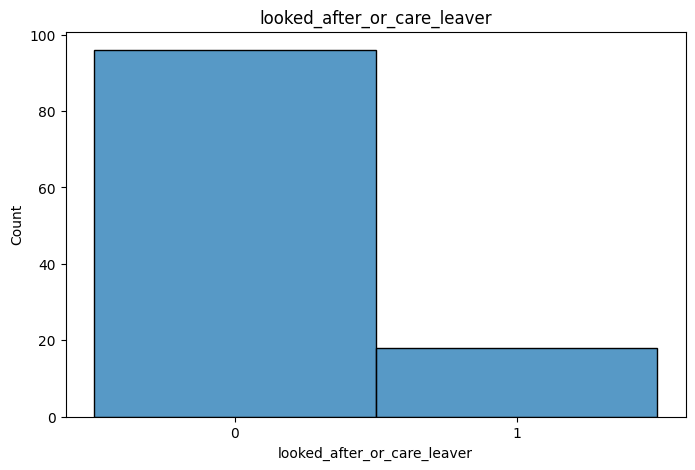

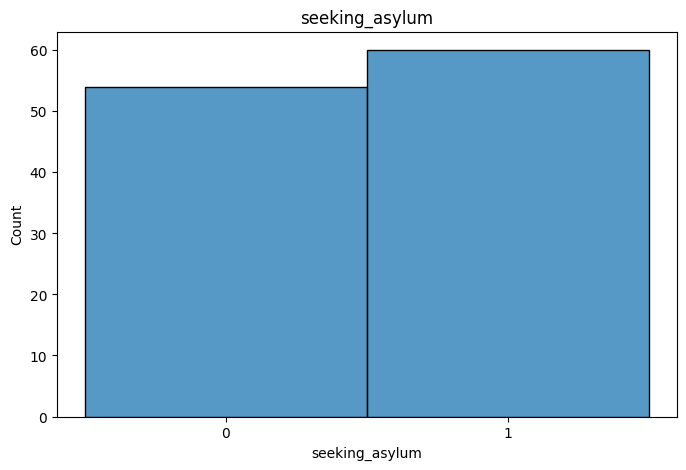

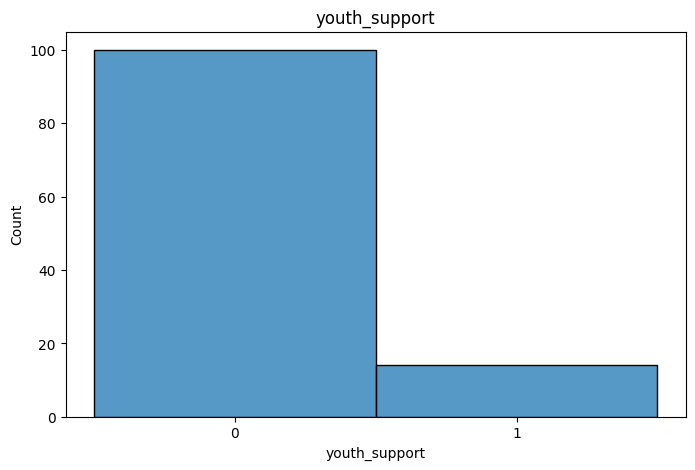

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

#Define columns for histograms
numeric_columns = ["No_Of_Dependents/Children", "Do_you_receive_Universal_Credit?",
                   "recently_released_prison(in the last 6 months)", "education/training",
                   "looked_after_or_care_leaver", "seeking_asylum", "youth_support"]
#Iterate through numeric_columns to create histograms
for col in numeric_columns:
    binsCount = len(data[col].unique()) # do this otherwise the columns with binary values have too many bins
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], bins=binsCount,binwidth=2, discrete=True)
    plt.xticks(sorted(data[col].dropna().unique())) # using this to make sure only the actual values appear , otherwise binary data columns are a range instead of actual values , e.g 0.1 , 0.2 , 03...1 etc
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()